In [1]:
%matplotlib inline
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from scipy import stats
from scipy.stats import shapiro 
import statsmodels.stats.api as sm
import statsmodels.api as sms
import pylab 

import DataHelper as dh

In [2]:
data = pd.read_csv('./data/HW_Data_Set.csv')
print(data.shape)
data.head()

(6167, 136)


C:\ProgramData\Anaconda3\envs\kod_env\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (128,129) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,...,ind_416,ind_418,ind_420,ind_422,ind_424,ind_426,ind_428,20_target,50_target,90_target
0,19,17,100.0,85.714286,14.285714,72.363515,60.808814,23.80,17.62,11.73,...,-49.6,-54,-152,-353,1.0,0.498547,0.701906,15.135802,35.625252,36.997753
1,24,19,100.0,78.571429,21.428571,74.275883,64.366798,11.45,18.16,12.22,...,-55.6,-60,-158,-359,1.0,0.537088,0.690833,15.143348,35.643013,37.016198
2,30,24,100.0,71.428571,28.571429,75.140402,65.915803,8.75,17.86,12.28,...,-58.4,-60,-160,-362,1.0,0.615169,0.693040,15.146870,35.651301,-37.024805
3,37,30,100.0,64.285714,35.714286,76.677846,68.584234,7.80,14.76,12.61,...,-61.8,-65,-166,-367,1.0,0.661517,0.673418,15.153283,0.000000,-37.040483
4,41,37,100.0,57.142857,42.857143,81.603007,76.455495,14.90,11.92,14.25,...,-79.8,-86,-186,-388,1.0,0.747204,0.700522,-15.179065,-35.727079,-37.103503


In [3]:
data_info = dh.Information(data)
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ind_5,6167.0,-0.803146,23.624403,-131.000000,-14.000000,0.000000,13.000000,76.000000
ind_6,6167.0,-0.803470,23.624144,-131.000000,-14.000000,0.000000,13.000000,76.000000
ind_8,6167.0,48.388890,36.388526,0.000000,14.285714,50.000000,85.714286,100.000000
ind_9,6167.0,48.289282,36.478009,0.000000,14.285714,50.000000,85.714286,100.000000
ind_10,6167.0,0.099609,60.414625,-100.000000,-50.000000,0.000000,57.142857,100.000000
...,...,...,...,...,...,...,...,...
ind_426,6167.0,0.498188,0.228547,0.000000,0.323783,0.495192,0.675730,1.000000
ind_428,6167.0,0.490174,0.150483,0.083530,0.379894,0.487078,0.601508,0.868534
20_target,6167.0,-0.057102,14.834497,-15.780588,-15.350354,0.000000,15.385945,15.768767
50_target,6167.0,-2.906358,34.559778,-37.142889,-36.208094,-34.267756,35.879524,37.038694


In [4]:
data_info.printDesc()

             ind_5        ind_6        ind_8        ind_9       ind_10  \
count  6167.000000  6167.000000  6167.000000  6167.000000  6167.000000   
mean     -0.803146    -0.803470    48.388890    48.289282     0.099609   
std      23.624403    23.624144    36.388526    36.478009    60.414625   
min    -131.000000  -131.000000     0.000000     0.000000  -100.000000   
25%     -14.000000   -14.000000    14.285714    14.285714   -50.000000   
50%       0.000000     0.000000    50.000000    50.000000     0.000000   
75%      13.000000    13.000000    85.714286    85.714286    57.142857   
max      76.000000    76.000000   100.000000   100.000000   100.000000   

            ind_12       ind_13       ind_14       ind_15       ind_16  ...  \
count  6167.000000  6167.000000  6167.000000  6167.000000  6167.000000  ...   
mean     49.488867   -18.497518    11.771485    11.773550    11.773392  ...   
std      12.198722    68.281120     6.803997     5.786089     4.970499  ...   
min      12.13454

In [5]:
data_info.printInfo()

The first 5 elements of the data
   ind_5  ind_6  ind_8      ind_9     ind_10     ind_12     ind_13  ind_14  \
0     19     17  100.0  85.714286  14.285714  72.363515  60.808814   23.80   
1     24     19  100.0  78.571429  21.428571  74.275883  64.366798   11.45   
2     30     24  100.0  71.428571  28.571429  75.140402  65.915803    8.75   
3     37     30  100.0  64.285714  35.714286  76.677846  68.584234    7.80   
4     41     37  100.0  57.142857  42.857143  81.603007  76.455495   14.90   

   ind_15  ind_16  ...  ind_416  ind_418  ind_420  ind_422  ind_424   ind_426  \
0   17.62   11.73  ...    -49.6      -54     -152     -353      1.0  0.498547   
1   18.16   12.22  ...    -55.6      -60     -158     -359      1.0  0.537088   
2   17.86   12.28  ...    -58.4      -60     -160     -362      1.0  0.615169   
3   14.76   12.61  ...    -61.8      -65     -166     -367      1.0  0.661517   
4   11.92   14.25  ...    -79.8      -86     -186     -388      1.0  0.747204   

    ind_428

In [6]:
data_info.printDescCol('20_target')

count    6167.000000
mean       -0.057102
std        14.834497
min       -15.780588
25%       -15.350354
50%         0.000000
75%        15.385945
max        15.768767
Name: 20_target, dtype: float64


In [7]:
data_info.printDescCol('50_target')

count    6167.000000
mean       -2.906358
std        34.559778
min       -37.142889
25%       -36.208094
50%       -34.267756
75%        35.879524
max        37.038694
Name: 50_target, dtype: float64


In [8]:
data_info.printDescCol('90_target')

count    6167.000000
mean       -3.315072
std        36.841541
min       -38.573858
25%       -37.695273
50%       -35.788391
75%        37.521892
max        38.465649
Name: 90_target, dtype: float64


In [9]:
data[['20_target','50_target','90_target']].head()

,20_target,50_target,90_target
0,15.135802,35.625252,36.997753
1,15.143348,35.643013,37.016198
2,15.146870,35.651301,-37.024805
3,15.153283,0.000000,-37.040483
4,-15.179065,-35.727079,-37.103503


In [10]:
data[['20_target','50_target','90_target']].describe().T

,count,mean,std,min,25%,50%,75%,max
20_target,6167.0,-0.057102,14.834497,-15.780588,-15.350354,0.000000,15.385945,15.768767
50_target,6167.0,-2.906358,34.559778,-37.142889,-36.208094,-34.267756,35.879524,37.038694
90_target,6167.0,-3.315072,36.841541,-38.573858,-37.695273,-35.788391,37.521892,38.465649


### 1- Pre-analysis <br>

After passing through the data description and info, these observations can be made: 

- The dimension of the dataset is big. There are 136 columns, 3 are targets (20_target, 50_target, 90_target) 
- 6167 records (rows)
- No null records :)
- After taking a look to the description of the columns (mean, max ...), it seems that there are many features that are dependent to each other. Example: ind_5 with ind_6, ind_8 with ind_9   

In [21]:
corr_data = data.corr()
corr_data[['20_target', '50_target', '90_target']]

In [42]:
corr_data[['20_target']].T

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,...,ind_412,ind_414,ind_416,ind_418,ind_424,ind_426,ind_428,20_target,50_target,90_target
20_target,0.060969,0.062101,-0.004126,-0.031316,0.016423,0.04255,0.041289,0.01532,0.012012,0.026881,...,0.066637,-0.029005,-0.009829,-0.045656,-0.008799,0.019599,0.047041,1.0,0.384076,0.35595


In [43]:
corr_data[['20_target']]**2

,20_target
ind_5,0.003717
ind_6,0.003857
ind_8,0.000017
ind_9,0.000981
ind_10,0.000270
...,...
ind_426,0.000384
ind_428,0.002213
20_target,1.000000
50_target,0.147514


In [47]:
corr_target20= (corr_data[['20_target']]**2).drop(['90_target','50_target']).sort_values(by=['20_target'], ascending=False, axis=0).T
corr_target20

,20_target,ind_37,ind_332,ind_130,ind_70,ind_50,ind_334,ind_36,ind_51,ind_67,...,ind_56,ind_234,ind_351,ind_225,ind_340,ind_352,ind_181,ind_217,ind_52,ind_315
20_target,1.0,0.008045,0.008042,0.006269,0.005203,0.005159,0.005055,0.005041,0.005028,0.004892,...,0.000017,0.000014,0.000014,0.000014,0.000008,0.000003,0.000003,0.000002,8.763579e-07,2.372689e-09


In [12]:
corr_data[corr_data > 0.7]

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,...,ind_412,ind_414,ind_416,ind_418,ind_424,ind_426,ind_428,20_target,50_target,90_target
ind_5,1.000000,0.989945,NaN,NaN,NaN,0.822255,0.768234,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.817302,NaN,NaN,NaN
ind_6,0.989945,1.000000,NaN,NaN,NaN,0.768551,0.713870,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.810371,NaN,NaN,NaN
ind_8,NaN,NaN,1.00000,NaN,0.828650,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ind_9,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ind_10,NaN,NaN,0.82865,NaN,1.000000,0.719409,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.739227,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ind_426,NaN,NaN,NaN,NaN,0.739227,0.776076,0.700736,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
ind_428,0.817302,0.810371,NaN,NaN,NaN,0.807595,0.727899,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN
20_target,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
50_target,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.940916


In [13]:
cols, rows = corr_data.shape
print (cols, " vs ", rows)
print(corr_data)

133  vs  133
              ind_5     ind_6     ind_8     ind_9    ind_10    ind_12  \
ind_5      1.000000  0.989945  0.543246 -0.533328  0.649225  0.822255   
ind_6      0.989945  1.000000  0.514222 -0.495572  0.608947  0.768551   
ind_8      0.543246  0.514222  1.000000 -0.374857  0.828650  0.583623   
ind_9     -0.533328 -0.495572 -0.374857  1.000000 -0.829576 -0.609288   
ind_10     0.649225  0.608947  0.828650 -0.829576  1.000000  0.719409   
...             ...       ...       ...       ...       ...       ...   
ind_426    0.626439  0.567359  0.593799 -0.631961  0.739227  0.776076   
ind_428    0.817302  0.810371  0.445427 -0.450719  0.540428  0.807595   
20_target  0.060969  0.062101 -0.004126 -0.031316  0.016423  0.042550   
50_target  0.068989  0.069652  0.006984 -0.004053  0.006654  0.055045   
90_target  0.060428  0.061560 -0.006650  0.012093 -0.011307  0.043786   

             ind_13    ind_14    ind_15    ind_16  ...   ind_412   ind_414  \
ind_5      0.768234 -0.014502 -0

In [14]:
col = corr_data.columns[0]
row = corr_data.index[0]
corr_data.loc[col, row]

1.0

In [15]:
accepte_corr = 0.70
size = 0
for i in range(cols):
    for j in range(rows):
        col = corr_data.columns[i]
        row = corr_data.index[j]
        if corr_data.loc[col, row] > accepte_corr and col !=row:
            print(corr_data.loc[col, row], '[',corr_data.columns[i] ,' , ',corr_data.index[j],']')
            size +=1

print("Correlated: ", size/2)            

0.9899450305813163 [ ind_5  ,  ind_6 ]
0.8222545510109105 [ ind_5  ,  ind_12 ]
0.7682343823284588 [ ind_5  ,  ind_13 ]
0.9591857709064446 [ ind_5  ,  ind_19 ]
0.9333225097575854 [ ind_5  ,  ind_20 ]
0.8341117762398222 [ ind_5  ,  ind_21 ]
0.7613807051460939 [ ind_5  ,  ind_34 ]
0.8050677596012971 [ ind_5  ,  ind_35 ]
0.7919501345716969 [ ind_5  ,  ind_36 ]
0.7197220111183483 [ ind_5  ,  ind_37 ]
0.7213994097336074 [ ind_5  ,  ind_39 ]
0.7429373459197092 [ ind_5  ,  ind_41 ]
0.7949729291641348 [ ind_5  ,  ind_62 ]
0.8065548581408613 [ ind_5  ,  ind_65 ]
0.7330330068720443 [ ind_5  ,  ind_71 ]
0.9324205700437507 [ ind_5  ,  ind_102 ]
0.9624761808792147 [ ind_5  ,  ind_118 ]
0.7784045336249353 [ ind_5  ,  ind_139 ]
0.9150646451353355 [ ind_5  ,  ind_142 ]
0.8023445048082538 [ ind_5  ,  ind_145 ]
0.8542118530787419 [ ind_5  ,  ind_150 ]
0.7635994686367346 [ ind_5  ,  ind_153 ]
0.7335637047487769 [ ind_5  ,  ind_399 ]
0.8173016148513872 [ ind_5  ,  ind_428 ]
0.9899450305813163 [ ind_6  ,  i

0.8682519499108314 [ ind_35  ,  ind_118 ]
0.8373480282788626 [ ind_35  ,  ind_139 ]
0.840406039032466 [ ind_35  ,  ind_142 ]
0.7876050672576907 [ ind_35  ,  ind_145 ]
0.9168368595731111 [ ind_35  ,  ind_150 ]
0.7833299596343324 [ ind_35  ,  ind_153 ]
0.7907775583853134 [ ind_35  ,  ind_428 ]
0.7919501345716969 [ ind_36  ,  ind_5 ]
0.7700060014460203 [ ind_36  ,  ind_6 ]
0.8246002093447524 [ ind_36  ,  ind_12 ]
0.7389988040001036 [ ind_36  ,  ind_13 ]
0.7156400930153417 [ ind_36  ,  ind_19 ]
0.7691400600028538 [ ind_36  ,  ind_20 ]
0.7480228041552612 [ ind_36  ,  ind_21 ]
0.7035665961333489 [ ind_36  ,  ind_33 ]
0.7864021049866433 [ ind_36  ,  ind_34 ]
0.8554592833096997 [ ind_36  ,  ind_35 ]
0.9257795935542071 [ ind_36  ,  ind_37 ]
0.7301699688362232 [ ind_36  ,  ind_41 ]
0.7465689276683746 [ ind_36  ,  ind_65 ]
0.8078805845569987 [ ind_36  ,  ind_71 ]
0.8136157362006612 [ ind_36  ,  ind_74 ]
0.8015973628294657 [ ind_36  ,  ind_77 ]
0.839851350924698 [ ind_36  ,  ind_102 ]
0.8784113933

0.8831822077217595 [ ind_50  ,  ind_49 ]
0.9511679125369076 [ ind_50  ,  ind_51 ]
0.7158037174914725 [ ind_50  ,  ind_61 ]
0.8718537753448732 [ ind_50  ,  ind_67 ]
0.9341256915566725 [ ind_50  ,  ind_70 ]
0.7354643951192583 [ ind_50  ,  ind_82 ]
0.8171904822181079 [ ind_50  ,  ind_128 ]
0.9907885120209716 [ ind_50  ,  ind_130 ]
0.873373510288875 [ ind_50  ,  ind_132 ]
0.7149591624454176 [ ind_50  ,  ind_392 ]
0.7723584983869466 [ ind_50  ,  ind_406 ]
0.7672566740160989 [ ind_51  ,  ind_49 ]
0.9511679125369076 [ ind_51  ,  ind_50 ]
0.776986859973113 [ ind_51  ,  ind_67 ]
0.870740184095248 [ ind_51  ,  ind_70 ]
0.8330302805498078 [ ind_51  ,  ind_82 ]
0.7019043768714855 [ ind_51  ,  ind_128 ]
0.9456595776691938 [ ind_51  ,  ind_130 ]
0.9670980003557825 [ ind_51  ,  ind_132 ]
0.8722401380073515 [ ind_52  ,  ind_43 ]
0.8778431341107288 [ ind_52  ,  ind_44 ]
0.8027042093194725 [ ind_52  ,  ind_45 ]
0.7276834886939463 [ ind_52  ,  ind_46 ]
0.7476924935413992 [ ind_52  ,  ind_116 ]
0.87507174

0.843821241543376 [ ind_118  ,  ind_428 ]
0.9239342547396839 [ ind_122  ,  ind_42 ]
0.7453009642592442 [ ind_122  ,  ind_43 ]
0.7799409461058835 [ ind_122  ,  ind_397 ]
0.7732485223993171 [ ind_122  ,  ind_407 ]
0.795159219844431 [ ind_124  ,  ind_43 ]
0.9485387663013479 [ ind_124  ,  ind_44 ]
0.9275569903890971 [ ind_124  ,  ind_45 ]
0.8695564738653982 [ ind_124  ,  ind_46 ]
0.7621098927311852 [ ind_124  ,  ind_47 ]
0.8750717476317015 [ ind_124  ,  ind_52 ]
0.835545241526038 [ ind_124  ,  ind_58 ]
0.8391726752171 [ ind_124  ,  ind_116 ]
0.836890414562938 [ ind_124  ,  ind_392 ]
0.72027231343671 [ ind_124  ,  ind_406 ]
0.8023947898394993 [ ind_124  ,  ind_407 ]
0.996143274578579 [ ind_124  ,  ind_410 ]
0.7545348804308947 [ ind_128  ,  ind_45 ]
0.8469874598980021 [ ind_128  ,  ind_46 ]
0.9446535320697279 [ ind_128  ,  ind_47 ]
0.9683681739930504 [ ind_128  ,  ind_48 ]
0.9556526526053695 [ ind_128  ,  ind_49 ]
0.8171904822181079 [ ind_128  ,  ind_50 ]
0.7019043768714855 [ ind_128  ,  ind

0.7457459566088575 [ ind_212  ,  ind_194 ]
0.7774847192185883 [ ind_212  ,  ind_387 ]
0.999907357404252 [ ind_225  ,  ind_234 ]
0.999907357404252 [ ind_234  ,  ind_225 ]
0.9973720234093231 [ ind_241  ,  ind_243 ]
0.9973720234093231 [ ind_243  ,  ind_241 ]
0.992355274069377 [ ind_311  ,  ind_313 ]
0.992355274069377 [ ind_313  ,  ind_311 ]
0.9986631195960255 [ ind_316  ,  ind_318 ]
0.7025067364358257 [ ind_316  ,  ind_321 ]
0.9986631195960255 [ ind_318  ,  ind_316 ]
0.7098542697006259 [ ind_318  ,  ind_321 ]
0.7025067364358257 [ ind_321  ,  ind_316 ]
0.7098542697006259 [ ind_321  ,  ind_318 ]
0.8205623946625146 [ ind_344  ,  ind_345 ]
0.8205623946625146 [ ind_345  ,  ind_344 ]
0.8709573503318995 [ ind_351  ,  ind_352 ]
0.8709573503318995 [ ind_352  ,  ind_351 ]
0.8010602498757161 [ ind_387  ,  ind_12 ]
0.7171589479373983 [ ind_387  ,  ind_13 ]
0.8306107618619311 [ ind_387  ,  ind_30 ]
0.8855177635948401 [ ind_387  ,  ind_31 ]
0.8540823661001322 [ ind_387  ,  ind_32 ]
0.7745543731553335 [

We can see that the correlation between features is high. somtimes it passes 0.9! This confirms our first intuition concerning that there many features that are dependent.

In [16]:
# TODO: detect the dependet features and eliminate them 


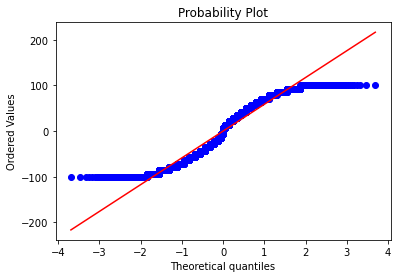

In [17]:

stats.probplot(data['ind_10'], dist='norm', plot=pylab) # normal probability plot
pylab.show()

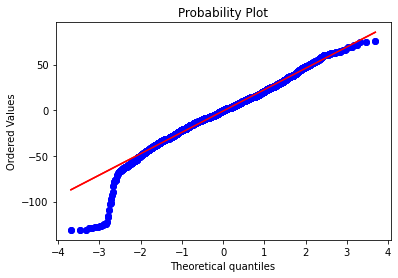

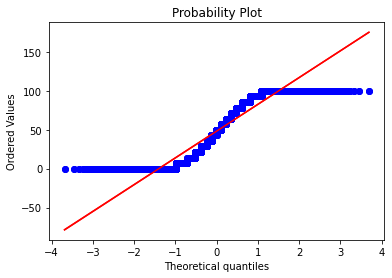

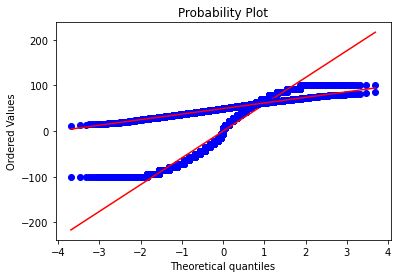

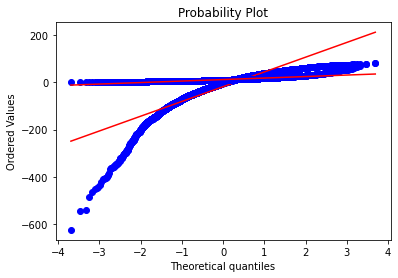

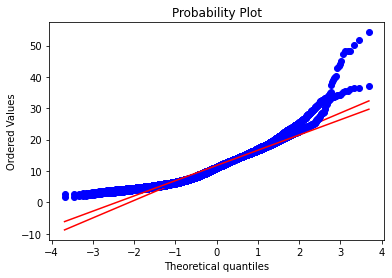

In [18]:

for i in range(cols):
    if i==10:
        break
        
    col = corr_data.columns[i]
    stats.probplot(data[col], dist='norm', plot=pylab) # normal probability plot
    #pylab.title="Prob plot of " + col
    if i!=0 and i%2 != 0:
        pylab.show()
print()   

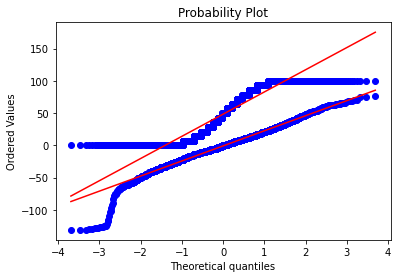

In [19]:
stats.probplot(data['ind_8'], dist='norm', plot=pylab) # normal probability plot
#pylab.show()
stats.probplot(data['ind_6'], dist='norm', plot=pylab) # normal probability plot
pylab.show()

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict 

ModuleNotFoundError: No module named 'sklearn'

In [ ]:
X = data.drop(["20_target", "50_target", "90_target"], axis=1)
y20=data["20_target"]
y50=data["50_target"]
y90=data["90_target"]

In [ ]:
X.head()

In [ ]:
print(y20.head(5))

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y20, test_size=0.20, random_state=42) 
x_train[0:10]

In [ ]:
lm= sms.OLS(y_train,x_train) #OLS (target, feature)
model = lm.fit()
model.summary()